In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
guns = pd.read_csv('../midtermViz/data/GunViolenceClean.csv')

In [3]:
guns.describe()

,Id,GDP,Homicides,Suicides,Guns_Per_Capita,Cultural_Diversity_Index,Latitude,Longitude
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,38.500000,31548.684211,4.791974,1.028816,14.431447,0.218789,27.700263,6.762368
std,22.083176,24314.711560,11.332375,1.241019,14.691788,0.173402,28.099808,64.414305
min,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,-40.900000,-106.350000
25%,19.750000,13075.000000,0.157500,0.295000,5.875000,0.093750,13.112500,-56.437500
50%,38.500000,26900.000000,0.350000,0.785000,9.900000,0.169500,39.015000,15.335000
75%,57.250000,44575.000000,2.715000,1.170000,21.175000,0.314000,47.735000,31.245000
max,76.000000,124900.000000,66.640000,6.690000,101.000000,0.667000,64.960000,174.890000


### Remove rows with empty fields

In [4]:
guns.shape

(76, 11)

In [5]:
guns = guns.dropna()
guns.shape

(76, 11)

## Visuals

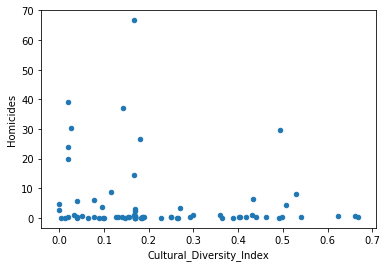

In [6]:
guns.plot.scatter(x='Cultural_Diversity_Index', y='Homicides')
plt.show()

### Homicides versus Guns Per Capita

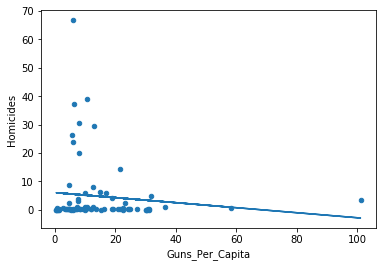

In [7]:
ax = guns.plot.scatter(x='Guns_Per_Capita', y='Homicides')
fit = np.polyfit(guns.Guns_Per_Capita, guns.Homicides, deg=1)
ax.plot(guns.Guns_Per_Capita, fit[0] * guns.Guns_Per_Capita + fit[1])
plt.show()

### Show regression using developed versus developing nations

In [8]:
developed_nations = guns[guns.developed_nation == True]
developing_nations = guns[guns.developed_nation == False]

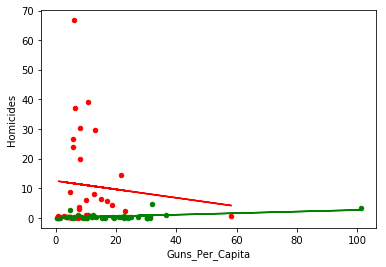

In [9]:
def developed_nations_plot():
    ax = developed_nations.plot.scatter(x='Guns_Per_Capita', y='Homicides', color='green')
    fit1 = np.polyfit(developed_nations.Guns_Per_Capita, developed_nations.Homicides, deg=1)
    ax.plot(developed_nations.Guns_Per_Capita, fit1[0] * developed_nations.Guns_Per_Capita + fit1[1], color='green')
    return ax

def developing_nations_plot(ax):
    developing_nations.plot.scatter(x='Guns_Per_Capita', y='Homicides', color='red', ax=ax)

    fit2 = np.polyfit(developing_nations.Guns_Per_Capita, developing_nations.Homicides, deg=1)
    ax.plot(developing_nations.Guns_Per_Capita, fit2[0] * developing_nations.Guns_Per_Capita + fit2[1], color='red')

ax = developed_nations_plot()
developing_nations_plot(ax)
plt.show()

### Homicides of developed nations

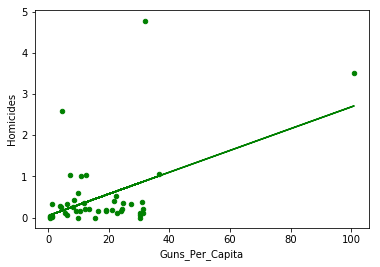

In [10]:
developed_nations_plot()
plt.show()